In [1]:
import pandas as pd
import numpy as np

In [14]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline

- 베이징 pm 2.5 대기오염 시계열 데이터

In [7]:
df = pd.read_csv('../pollution.csv', index_col = 0,)

In [8]:
df.head()

,pollution,dew,temp,press,wind_dir,wind_spd,snow,rain
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [9]:
df.index # index가 object로 되어 있음.

Index(['2010-01-02 00:00:00', '2010-01-02 01:00:00', '2010-01-02 02:00:00',
       '2010-01-02 03:00:00', '2010-01-02 04:00:00', '2010-01-02 05:00:00',
       '2010-01-02 06:00:00', '2010-01-02 07:00:00', '2010-01-02 08:00:00',
       '2010-01-02 09:00:00',
       ...
       '2014-12-31 14:00:00', '2014-12-31 15:00:00', '2014-12-31 16:00:00',
       '2014-12-31 17:00:00', '2014-12-31 18:00:00', '2014-12-31 19:00:00',
       '2014-12-31 20:00:00', '2014-12-31 21:00:00', '2014-12-31 22:00:00',
       '2014-12-31 23:00:00'],
      dtype='object', length=43800)

In [10]:
# dataframe의 index를 datetime format으로 변환함.
df.index = pd.to_datetime(df.index)

In [12]:
df.index

DatetimeIndex(['2010-01-02 00:00:00', '2010-01-02 01:00:00',
               '2010-01-02 02:00:00', '2010-01-02 03:00:00',
               '2010-01-02 04:00:00', '2010-01-02 05:00:00',
               '2010-01-02 06:00:00', '2010-01-02 07:00:00',
               '2010-01-02 08:00:00', '2010-01-02 09:00:00',
               ...
               '2014-12-31 14:00:00', '2014-12-31 15:00:00',
               '2014-12-31 16:00:00', '2014-12-31 17:00:00',
               '2014-12-31 18:00:00', '2014-12-31 19:00:00',
               '2014-12-31 20:00:00', '2014-12-31 21:00:00',
               '2014-12-31 22:00:00', '2014-12-31 23:00:00'],
              dtype='datetime64[ns]', length=43800, freq=None)

In [13]:
# dataframe에서 column 별로 nan값 count함
df.isna().sum()

pollution    0
dew          0
temp         0
press        0
wind_dir     0
wind_spd     0
snow         0
rain         0
dtype: int64

- asfreq : 시계열을 특정 frequency로 변환함. upsampling, downsampling에 사용

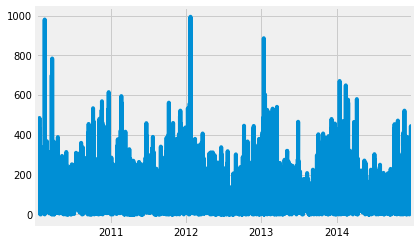

In [15]:
# default 단위 : 시간
df.pollution.plot()

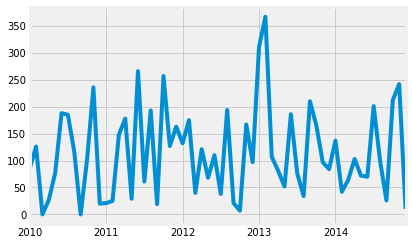

In [16]:
# M : 한 달, 3M : 3달
df.pollution.asfreq('M').plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fb051ada0>,
      dtype=object)

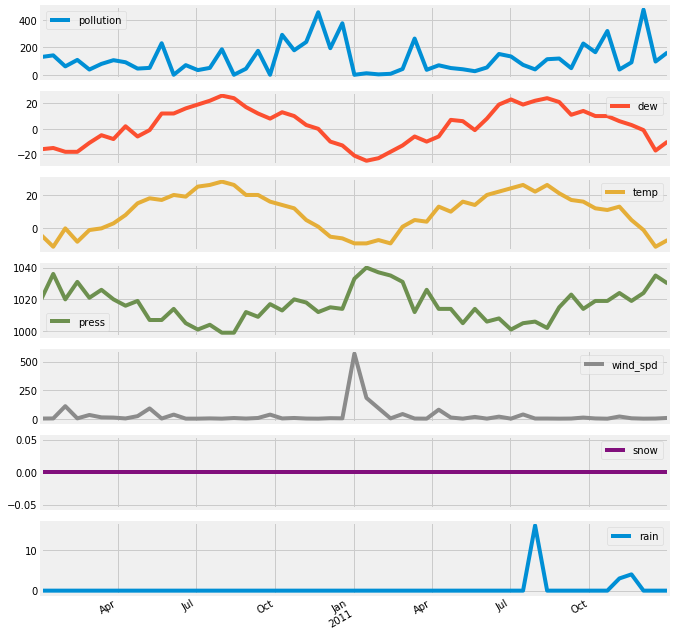

In [26]:
# dataframe에 대해 plot을 그리면 column 전부에 대한 시계열 데이터를 시각화할 수 있음.
df['2010' : '2011'].asfreq('14D').plot(subplots=True, figsize=(10, 12))

## Timestamp vs Period

- Timestamp : 특정 시점을 나타내기 위해 사용됨.
- Period : 특정 기간을 나타내기 위해 사용됨.

In [28]:
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [29]:
period = pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

In [31]:
period.start_time < timestamp < period.end_time

True

In [34]:
new_period = timestamp.to_period(freq='H')
new_period

Period('2017-01-01 12:00', 'H')

## date_range

In [35]:
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [36]:
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [37]:
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3


DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [38]:
dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

## Shifting and lags

- 과거와 현재의 시계열을 비교하는데 유용

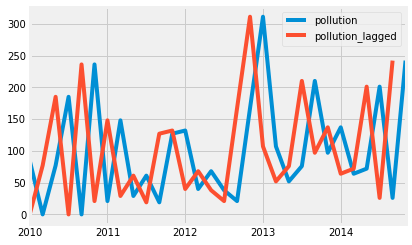

In [96]:
df.pollution.asfreq('2M').plot(legend=True)
shifted = df.pollution.asfreq('2M').shift(-1).plot(legend=True)
shifted.legend(['pollution', 'pollution_lagged'])

## Resampling

- Upsampling : 시계열을 low frequency -> high frequency로 변환. 월 데이터 -> 일 데이터
- Downsampling : 시계열을 high frequency -> low frequency로 변환. 일 데이터 -> 월 데이터

In [44]:
df.shape

(43800, 8)

In [46]:
df.head()

,pollution,dew,temp,press,wind_dir,wind_spd,snow,rain
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [48]:
df_tmp = df.resample('1D').mean()
df_tmp.head()

,pollution,dew,temp,press,wind_spd,snow,rain
2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0
2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0
2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0
2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0
2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0


In [49]:
df_tmp.shape

(1825, 7)

## Percent change

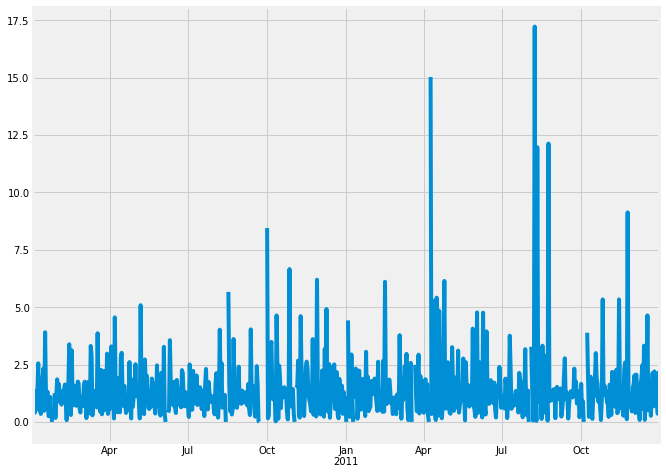

In [51]:
df_tmp['pol_change'] = df_tmp['pollution'].div(df_tmp['pollution'].shift())
df_tmp['pol_change']['2010' : '2011'].plot(figsize=(10, 8))

In [56]:
# df_tmp.dew.sub(1).mul(100)

In [57]:
df.pollution

2010-01-02 00:00:00    129.0
2010-01-02 01:00:00    148.0
2010-01-02 02:00:00    159.0
2010-01-02 03:00:00    181.0
2010-01-02 04:00:00    138.0
                       ...  
2014-12-31 19:00:00      8.0
2014-12-31 20:00:00     10.0
2014-12-31 21:00:00     10.0
2014-12-31 22:00:00      8.0
2014-12-31 23:00:00     12.0
Name: pollution, Length: 43800, dtype: float64

In [60]:
df.pollution.diff()

2010-01-02 00:00:00     NaN
2010-01-02 01:00:00    19.0
2010-01-02 02:00:00    11.0
2010-01-02 03:00:00    22.0
2010-01-02 04:00:00   -43.0
                       ... 
2014-12-31 19:00:00    -2.0
2014-12-31 20:00:00     2.0
2014-12-31 21:00:00     0.0
2014-12-31 22:00:00    -2.0
2014-12-31 23:00:00     4.0
Name: pollution, Length: 43800, dtype: float64

In [61]:
df.columns

Index(['pollution', 'dew', 'temp', 'press', 'wind_dir', 'wind_spd', 'snow',
       'rain'],
      dtype='object')

In [72]:
df['pollution']

2010-01-02 00:00:00    129.0
2010-01-02 01:00:00    148.0
2010-01-02 02:00:00    159.0
2010-01-02 03:00:00    181.0
2010-01-02 04:00:00    138.0
                       ...  
2014-12-31 19:00:00      8.0
2014-12-31 20:00:00     10.0
2014-12-31 21:00:00     10.0
2014-12-31 22:00:00      8.0
2014-12-31 23:00:00     12.0
Name: pollution, Length: 43800, dtype: float64

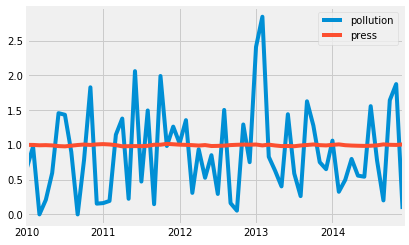

In [77]:
normalized_temp = df.pollution.div(df['pollution'].iloc[0])#.mul(100)
normalized_press = df.press.div(df['press'].iloc[0])#.mul(100)
normalized_temp.asfreq('M').plot()
normalized_press.asfreq('M').plot()
plt.legend(['pollution', 'press'])

## Window function
- rolling : 일정 구간에서 연산 수행
- expanding : 이전 값 전체를 가지고 연산 수행

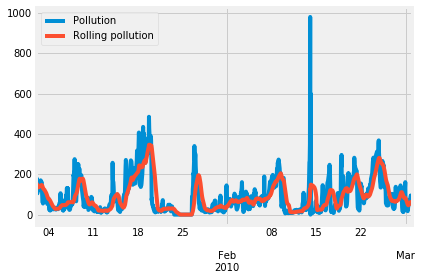

In [92]:
rolling_pol = df.pollution.rolling('D').mean()
df.pollution['2010-01-01' : '2010-03-01'].plot()
rolling_pol['2010-01-01' : '2010-03-01'].plot()
plt.legend(['Pollution', 'Rolling pollution'])

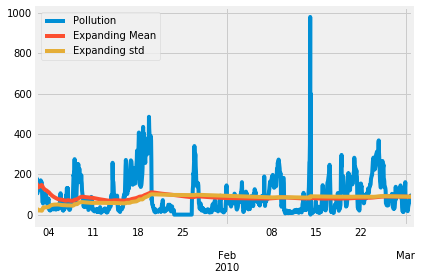

In [81]:
pol_mean = df.pollution.expanding().mean()
pol_std = df.pollution.expanding().std()
df.pollution['2010-01-01' : '2010-03-01'].plot()
pol_mean['2010-01-01' : '2010-03-01'].plot()
pol_std['2010-01-01' : '2010-03-01'].plot()
plt.legend(['Pollution', 'Expanding Mean', 'Expanding std'])

## Autocorrelation and Partial Autocorrelation
- Autocorrelation : ACT(Autocorrelation function)은 lags만큼 이동시킨 뒤의 자기 자신과의 공분산을 의미. 현재와 과거의 연관성을 확인할 수 있음
- Partial Autocorrelation 
- 일반적으로 추세를 확인하고 이동 평균 매개 변수의 가능한 값을 추론하는데 ACF를 사용
- 자동회귀부분에는 PACF를 사용

In [82]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

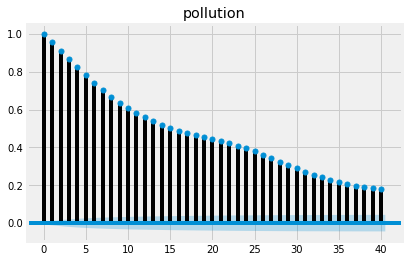

In [97]:
plot_acf(df["pollution"],lags=40,title="pollution")
plt.show()

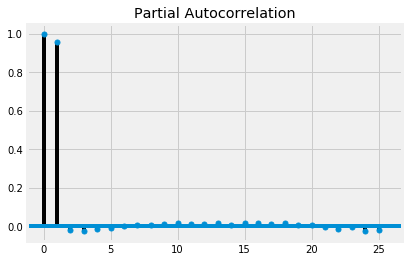

In [85]:
plot_pacf(df["pollution"],lags=25)
plt.show()

## Trends, seasonality and noise
- Trend : 일정한 상승 또는 하강 기울기
- Seasonality : 시계열에서의 명확한 패턴(사인 함수)
- Noise ; 특이점(outlier) 혹은 누락 데이터

In [86]:
import statsmodels.api as sm

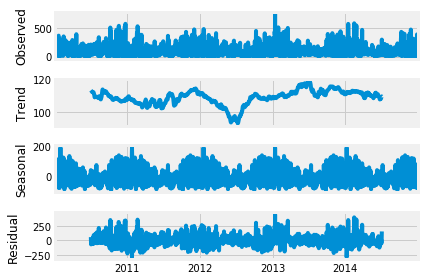

In [90]:
decompose = sm.tsa.seasonal_decompose(df['pollution'].asfreq('D'), freq=360)
figure = decompose.plot()
plt.show()